In [15]:
%matplotlib nbagg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.spatial.distance import cdist
from scipy.cluster.vq import vq
from sklearn import preprocessing
from sklearn import decomposition
import urllib, urlparse
import os
from os import listdir
from os.path import isfile, join
import time
import cProfile

min_max_scaler = preprocessing.MinMaxScaler((-1,1))

In [16]:
from sklearn.datasets import load_iris
iris = load_iris()


In [17]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target)
#print X_train

# section 2.1

In [18]:
from sklearn.cluster import KMeans
X_train = preprocessing.scale(X_train,axis = 0, with_mean=True, with_std=True)
X_train = min_max_scaler.fit_transform(X_train)
from extract_data import load_flickr60K_data
content = load_flickr60K_data()
content = preprocessing.scale(content,axis = 0, with_mean=True, with_std=True)
content = min_max_scaler.fit_transform(content)
#data = preprocessing.scale(data,axis = 0, with_mean=True, with_std=True)   
start_time = time.time()
k_means = KMeans(init='k-means++', n_clusters=5, n_init=100)
k_means.fit(X_train)
print("--- %s seconds ---" % (time.time() - start_time))

#print(k_means.labels_)

start_time = time.time()
#print X_train
k_means = KMeans(init='k-means++', n_clusters=10, n_init=100)
k_means.fit(content)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.193000078201 seconds ---
--- 0.322000026703 seconds ---


In [19]:
def mykmeans(datapoints,n_cluster,max_iter):
    data_x_shape = datapoints.shape[0]
    #print data_x_shape
    random_index = np.random.randint(data_x_shape, size = n_cluster)
    #print random_index
    random_number = 11122015
    rng = np.random.RandomState(random_number)
    
    permutation1 = rng.permutation(len(random_index))
    #print permutation1
    
    random_index = random_index[permutation1]
    #print random_index
    """
    initial_clust_c = np.zeros((n_cluster,datapoints.shape[1]))
    for i in range(0,n_cluster):
        initial_clust_c[i,:] = datapoints[random_index[i],:]
    """
    initial_clust_centers = datapoints[random_index]
    initial_class = np.zeros((datapoints.shape[0]))
    
    #print datapoints
    #print initial_clust_c
    #print initial_clust_centers.shape
    for j in range(0,max_iter):
        Y= cdist(datapoints, initial_clust_centers, metric='euclidean', p=2, V=None, VI=None, w=None)
        #print Y.shape
        #print Y
        #target_class = np.zeros((datapoints.shape[0]))
        #for i in range(0,Y.shape[0]):
        target_dist = np.amin(Y, axis=1)  
        #print target_dist
        #print target_dist.shape
        #print j
        target_class = np.argmin(Y, axis=1)
        #print target_class
        #print initial_class
        #print target_class.shape
        for i in range(0,n_cluster):
            #indices = target_class[target_class == i]
            values = datapoints[target_class == i]
            #print i
            #print values
            initial_clust_centers[i,:] = np.mean(values, axis = 0)
            #print initial_clust_centers[i,:]
            #print initial_clust_centers[i,:].shape
        #print initial_clust_centers
        #if initial_class.all() == target_class.all():
        if np.array_equal(initial_class,target_class):
            print j
            print 'converged'
            #print initial_class
            #print target_class
            break
        else:
            initial_class = target_class
    """ 
    colors = np.arange(0,n_cluster,1)
    Axes3D.scatter(X_train,target_class,c=colors)
    Axes3D.show()
    """
    #pca = decomposition.PCA(n_components = 3)
    #pca.fit(datapoints)
    #datapoints1 = pca.transform(datapoints)
    #print datapoints1
    #print datapoints2
    
    #print datapoints
    """
    pca_val = np.concatenate((datapoints,initial_clust_centers),axis = 0)
    pca = decomposition.PCA(n_components = 2)
    pca.fit(pca_val)
    Xc_pca = pca.transform(pca_val)
    X_pca = Xc_pca[0:datapoints.shape[0],:]
    c_pca = Xc_pca[datapoints.shape[0]:Xc_pca.shape[0],:]
    #print c_pca

    plt.figure()
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=target_class)
    plt.scatter(c_pca[:, 0],c_pca[:,1], marker='x',color='black')
    plt.title("mykmeans")
    """
    return initial_clust_centers, target_class      
        

In [20]:
start_time = time.time()
#print X_train
clust_centers, labels = mykmeans(X_train,10,100)
print("--- %s seconds ---" % (time.time() - start_time))

cProfile.run('mykmeans(X_train,10,100)')
start_time = time.time()
#print X_train
clust_centers, labels = mykmeans(content,5,100)
print("--- %s seconds ---" % (time.time() - start_time))

7
converged
--- 0.00400018692017 seconds ---
         15300 function calls in 0.047 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.010    0.010    0.047    0.047 <ipython-input-19-65bd2f5b3f2f>:1(mykmeans)
        1    0.000    0.000    0.047    0.047 <string>:1(<module>)
      100    0.000    0.000    0.002    0.000 _methods.py:28(_amin)
      100    0.000    0.000    0.000    0.000 _methods.py:40(_all)
     1000    0.001    0.000    0.002    0.000 _methods.py:43(_count_reduce_items)
     1000    0.010    0.000    0.021    0.000 _methods.py:53(_mean)
      400    0.000    0.000    0.000    0.000 distance.py:111(_convert_to_double)
      100    0.001    0.000    0.011    0.000 distance.py:1720(cdist)
      200    0.000    0.000    0.002    0.000 distance.py:80(_copy_array_if_base_present)
      200    0.000    0.000    0.002    0.000 distance.py:92(_copy_arrays_if_base_present)
      100    0.000    0.000   

#Section 2.2
    

In [21]:
def mykmeans_multi(datapoints,n_cluster,max_iter,multi_iter):
    G_kmeans = 0
    final_centroids = np.zeros((n_cluster,datapoints.shape[1]))
    final_labels = np.zeros((datapoints.shape[0]))
    index = np.zeros((multi_iter))
    distortion = np.zeros((multi_iter))
    for i in range(0,multi_iter):
        G_kmeans_prime = 0
        centroids,labels = mykmeans(datapoints,n_cluster,max_iter)
        if i == 0:
            final_centroids = centroids
            for j in range(0,n_cluster):
                values = datapoints[labels == j]
                #print values.shape
                centroid = np.mat(centroids[j,:])
                G_kmeans_prime = G_kmeans_prime + np.sum(cdist(values,centroid,metric='euclidean', p=2, V=None, VI=None, w=None),axis = 0)
                #print values
                #print centroid.shape
                #print centroid
                #print j
                #print cdist(values,centroid,metric='euclidean', p=2, V=None, VI=None, w=None)
                #print 'G_kmeans_prime'
            #print i
            #print G_kmeans_prime
            G_kmeans = G_kmeans_prime
            final_labels = labels
        else:
            for j in range(0,n_cluster):
                values = datapoints[labels == j]
                #print values.shape
                centroid = np.mat(centroids[j,:])
                G_kmeans_prime = G_kmeans_prime + np.sum(cdist(values,centroid,metric='euclidean', p=2, V=None, VI=None, w=None),axis = 0)
            if G_kmeans_prime < G_kmeans:
                final_centroids = centroids
                final_labels = labels
                G_kmeans = G_kmeans_prime
        index[i] = i
        distortion[i] = G_kmeans
     
   
        
        #print i
        #print G_kmeans

    #plt.show()
    plt.figure()    
    plt.plot(np.arange(multi_iter),distortion,'c',linewidth=2.5, linestyle="-",label = 'distortion') 
    plt.title("mykmeans_multi distortion plot")
    return final_centroids,final_labels
            
            
        
    

7
converged
8
converged
3
converged
15
converged
6
converged
4
converged
4
converged
5
converged
7
converged
3
converged


<IPython.core.display.Javascript object>


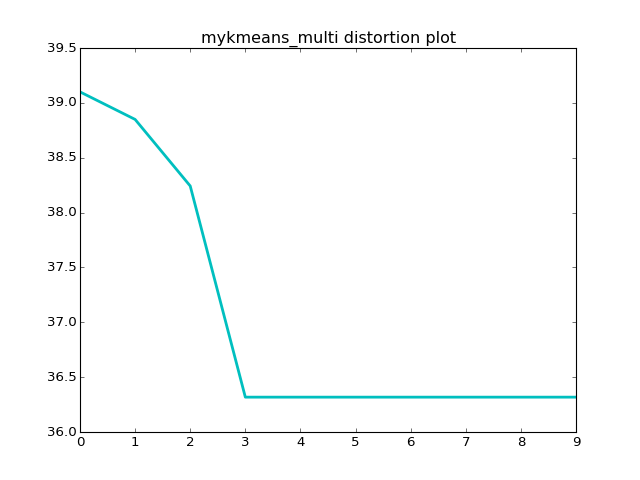

'\nstart_time = time.time()\nmulti_centroids,multi_labels = mykmeans_multi(content,10,100,10)\nprint("--- %s seconds ---" % (time.time() - start_time))\n\npca_val = np.concatenate((content,multi_centroids),axis = 0)\npca = decomposition.PCA(n_components = 2)\npca.fit(pca_val)\nXc_pca = pca.transform(pca_val)\nX_pca = Xc_pca[0:content.shape[0],:]\nc_pca = Xc_pca[content.shape[0]:Xc_pca.shape[0],:]\n#print c_pca\n\nplt.figure()\nplt.scatter(X_pca[:, 0], X_pca[:, 1], c=multi_labels)\nplt.scatter(c_pca[:, 0],c_pca[:,1], marker=\'x\',color=\'black\')\nplt.title("kmeans-multi")\n'

In [22]:
multi_centroids,multi_labels = mykmeans_multi(X_train,5,100,10)
"""
pca_val = np.concatenate((X_train,multi_centroids),axis = 0)
pca = decomposition.PCA(n_components = 2)
pca.fit(pca_val)
Xc_pca = pca.transform(pca_val)
X_pca = Xc_pca[0:X_train.shape[0],:]
c_pca = Xc_pca[X_train.shape[0]:Xc_pca.shape[0],:]
#print c_pca

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=multi_labels)
plt.scatter(c_pca[:, 0],c_pca[:,1], marker='x',color='black')
plt.title("kmeans-multi")
#plt.show()
"""
"""
start_time = time.time()
multi_centroids,multi_labels = mykmeans_multi(content,10,100,10)
print("--- %s seconds ---" % (time.time() - start_time))

pca_val = np.concatenate((content,multi_centroids),axis = 0)
pca = decomposition.PCA(n_components = 2)
pca.fit(pca_val)
Xc_pca = pca.transform(pca_val)
X_pca = Xc_pca[0:content.shape[0],:]
c_pca = Xc_pca[content.shape[0]:Xc_pca.shape[0],:]
#print c_pca

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=multi_labels)
plt.scatter(c_pca[:, 0],c_pca[:,1], marker='x',color='black')
plt.title("kmeans-multi")
"""


#print multi_centroids

# Section 2.3

In [23]:
def mykmeansplusplus (datapoints,n_cluster,max_iter):
    data_x_shape = datapoints.shape[0]
    random_index = np.random.randint(data_x_shape, size =1)
    initial_clust_center = datapoints[random_index]
    weight = np.zeros((datapoints.shape[0]))
    index = np.zeros((datapoints.shape[0]))

    for i in range(0,(n_cluster - 1)):
        Y= cdist(datapoints, initial_clust_center, metric='euclidean', p=2, V=None, VI=None, w=None)
        #print Y.shape
        #if Y.shape[1] > 1:
        min_dist = np.amin(Y, axis=1) 
        min_center = np.argmin(Y, axis=1)
        min_dist_sum = np.sum(min_dist, axis=0)
        min_squared_dist_sum = np.sum(min_dist**2, axis=0)
        min_dist = min_dist**2
        min_dist_prob = min_dist / min_squared_dist_sum
        next_index = np.random.choice(datapoints.shape[0],1,p=min_dist_prob)
        initial_clust_center = np.concatenate((initial_clust_center,datapoints[next_index]),axis=0)
        
        #print nex_index
        
        #print min_dist_prob
        
        """
        print min_dist
        print min_center
        print min_dist_sum
        print min_squared_dist_sum
        print min_dist**2
        """    
            
        """
        distance_matrix = np.zeros((datapoints.shape[0],initial_clust_center.shape[0]))
        for j in range(0,datapoints.shape[0]):
            for k in range(0,initial_clust_center.shape[0]):
                distance = np.linalg.norm(datapoints[j,:]-initial_clust_center[k,:])
                distance_matrix[j][k] = distance
        """
        #Y_sum = np.sum(Y,axis = 0)
        #print Y
        #print Y_sum
        #print Y
        #print distance_matrix
        
        
    #print initial_clust_center
    initial_class = np.zeros((datapoints.shape[0]))
    for j in range(0,max_iter):
        Z= cdist(datapoints, initial_clust_center, metric='euclidean', p=2, V=None, VI=None, w=None)
        target_dist = np.amin(Z, axis=1)  
        target_class = np.argmin(Z, axis=1)
        for i in range(0,n_cluster):
            values = datapoints[target_class == i]
            initial_clust_center[i,:] = np.mean(values, axis = 0)
        if np.array_equal(initial_class,target_class):
            print j
            print 'converged'
            break
        else:
            initial_class = target_class

    return initial_clust_center, target_class  
        
    
    
    
    

4
converged
--- 0.00499987602234 seconds ---


<IPython.core.display.Javascript object>


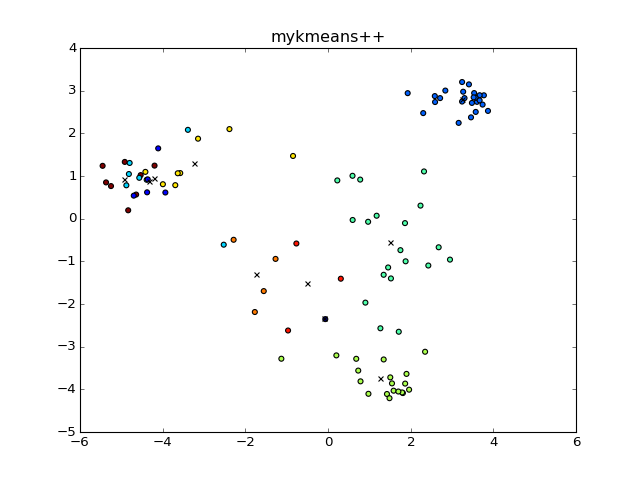

--- 0.351999998093 seconds ---


In [24]:
"""
start_time = time.time()
clust_centers, labels = mykmeansplusplus(X_train,5,10)
print("--- %s seconds ---" % (time.time() - start_time))
pca_val = np.concatenate((X_train,clust_centers),axis = 0)
pca = decomposition.PCA(n_components = 2)
pca.fit(pca_val)
Xc_pca = pca.transform(pca_val)
X_pca = Xc_pca[0:X_train.shape[0],:]
c_pca = Xc_pca[X_train.shape[0]:Xc_pca.shape[0],:]
#print c_pca

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.scatter(c_pca[:, 0],c_pca[:,1], marker='x',color='black')
plt.title('mykmeans++')
"""

start_time = time.time()
clust_centers, labels = mykmeansplusplus(content,10,10)
print("--- %s seconds ---" % (time.time() - start_time))
pca_val = np.concatenate((content,clust_centers),axis = 0)
pca = decomposition.PCA(n_components = 2)
pca.fit(pca_val)
Xc_pca = pca.transform(pca_val)
X_pca = Xc_pca[0:content.shape[0],:]
c_pca = Xc_pca[content.shape[0]:Xc_pca.shape[0],:]
#print c_pca

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.scatter(c_pca[:, 0],c_pca[:,1], marker='x',color='black')
plt.title('mykmeans++')


#plt.show()
#print clust_centers
#data = preprocessing.scale(data,axis = 0, with_mean=True, with_std=True)   
start_time = time.time()
k_means = KMeans(init='k-means++', n_clusters=10, n_init=100)
k_means.fit(content)
print("--- %s seconds ---" % (time.time() - start_time))




# Section 3.1

In [25]:
"""from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets import load_files
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
#twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
container_path = 'C:\Users\Subhankari\Desktop\desktop_as_on_13th_april\text books\ML\CML_Assignment_2_sm6202\sklearn_tut_workspace\data\twenty_newsgroups\20news-bydate\20news-bydate-train'
twenty_train = load_files(container_path, description=None, categories=None, load_content=True, shuffle=True, encoding=None, decode_error='strict', random_state=0)
X, y  = (twenty_train.data, twenty_train.target)
twenty_train.target_names
print len(twenty_train.data)
print len(twenty_train.filenames)"""

"from sklearn.datasets import fetch_20newsgroups\nfrom sklearn.datasets import load_files\ncategories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']\n#twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)\ncontainer_path = 'C:\\Users\\Subhankari\\Desktop\\desktop_as_on_13th_april\text books\\ML\\CML_Assignment_2_sm6202\\sklearn_tut_workspace\\data\twenty_newsgroups\x10news-bydate\x10news-bydate-train'\ntwenty_train = load_files(container_path, description=None, categories=None, load_content=True, shuffle=True, encoding=None, decode_error='strict', random_state=0)\nX, y  = (twenty_train.data, twenty_train.target)\ntwenty_train.target_names\nprint len(twenty_train.data)\nprint len(twenty_train.filenames)"

In [34]:
def learnvocabulary(orig_datapoints,n_cluster,max_itr):
    clust_centers, labels = mykmeansplusplus(orig_datapoints,n_cluster,max_itr)
    return clust_centers   

In [35]:
def bof(datapoints,centroids):
    bag_of_f_vector = np.zeros((centroids.shape[0]))
    calc_dist = cdist(datapoints, centroids, metric='euclidean', p=2, V=None, VI=None, w=None)
    labels = np.argmin(calc_dist,axis=1)
    for i in range (0,labels.shape[0]):
        bag_of_f_vector[labels[i]] =  bag_of_f_vector[labels[i]] + 1
        
    #print bag_of_f_vector
    return bag_of_f_vector
        
        
    

In [40]:
def bof_data(centroids,mod):
    mypath = 'C:/Users/Subhankari/Desktop/desktop_as_on_13th_april/text books/ML/project/ImageRetrieval/Notebook/dataset/unnormalized_tab2'
    feature_vector = np.zeros((centroids.shape[0]))
    j = 0
    k  = 0
    for f in listdir(mypath):
        j = j + 1
        #print 'j'
        #print j
        if j % mod == 0:
            if isfile(join(mypath,f)):
                with open(join(mypath,f)) as f1:
                    data = np.zeros((1,128)) 
                    data = np.matrix(data)
                    i = 0
                    for line in f1:
                        if not line.isspace():
                            floats = map(float, line.split())
                            floats = np.asarray(floats)
                            float1 = np.matrix(floats)
                            float1 = np.asarray(float1)
                            if i > 0:
                                data = np.concatenate((data,float1),axis=0)
                            else:
                                data[i,:] = float1
                            i += 1
                    data = preprocessing.scale(content,axis = 0, with_mean=True, with_std=True) 
                    f_vector = bof(data,centroids)
                    f_vector = np.matrix(f_vector)
                    #print f_vector
                    #print f_vector.shape
                    #print 'k'
                    #print k
                    if k > 0:
                        feature_vector = np.concatenate((feature_vector,f_vector),axis=0)
                    else:    
                        feature_vector = f_vector#bof(data,centroids)
                    k = k + 1
    return feature_vector

In [41]:
from load_data import load_data
content = load_data()

content = preprocessing.scale(content,axis = 0, with_mean=True, with_std=True)
centroids = learnvocabulary(content,100,10)
fvector = bof_data(centroids,10)









In [42]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
fvector1 = bof_data(centroids,51)
neigh.fit(f_vector, fvector1) 